In [3]:
# basic stuff
import os
import pandas as pd
import numpy as np
from random import randint, uniform
from datetime import datetime
from urllib.request import urlretrieve
from zipfile import ZipFile
import pysal

# geo stuff
import geopandas as gpd
from shapely.geometry import Point

# plotting stuff
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# widget stuff
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

# progress stuff
from tqdm import tqdm_notebook, tqdm_pandas

# turn warnings off
import warnings
warnings.filterwarnings('ignore')

In [4]:
sg_region = gpd.read_file('assets\Geojson\district_and_planning_area.geojson')

In [5]:
sg_region.head()

,district,planning_area,geometry
0,East,Bedok,"MULTIPOLYGON (((103.93208 1.30555, 103.93208 1..."
1,Central,Bukit Timah,"MULTIPOLYGON (((103.79766 1.34813, 103.79806 1..."
2,West,Bukit Batok,"MULTIPOLYGON (((103.76408 1.37001, 103.76444 1..."
3,Central,Bukit Merah,"MULTIPOLYGON (((103.82362 1.26018, 103.82362 1..."
4,North,Central Water Catchment,"MULTIPOLYGON (((103.80702 1.41126, 103.80754 1..."


<AxesSubplot: >

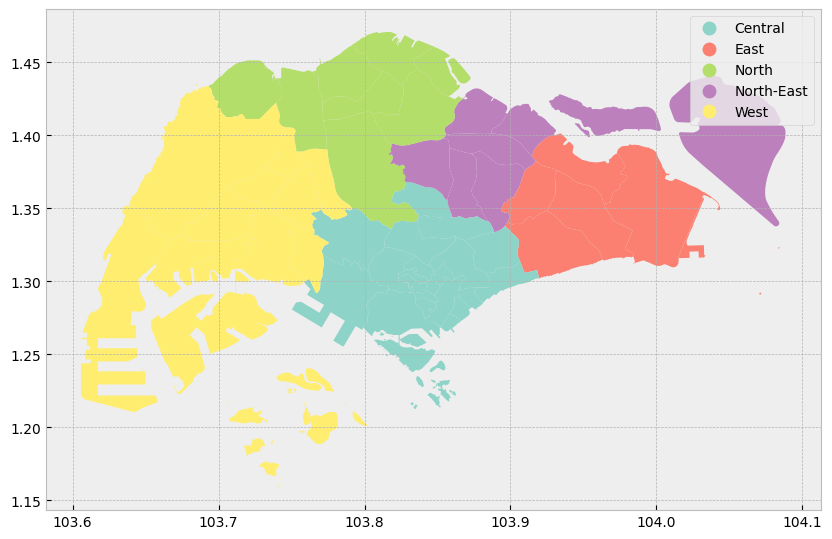

In [6]:
sg_region.plot(column='district', cmap='Set3', legend=True)

In [7]:
cluster_1 = gpd.read_file('assets\Geojson\cluster\case_central.geojson')
cluster_2 = gpd.read_file('assets\Geojson\cluster\case_north_east.geojson')
cluster_3 = gpd.read_file('assets\Geojson\cluster\case_north_west.geojson')
cluster_4 = gpd.read_file('assets\Geojson\cluster\case_south_east.geojson')
cluster_5 = gpd.read_file('assets\Geojson\cluster\case_south_west.geojson')

In [8]:
all_cluster = gpd.GeoDataFrame(pd.concat([cluster_1, cluster_2, cluster_3, cluster_4, cluster_5], ignore_index=True))

In [9]:
habitat_1 = gpd.read_file('assets\Geojson\habitat\habitat_central.geojson')
habitat_2 = gpd.read_file('assets\Geojson\habitat\habitat_north_east.geojson')
habitat_3 = gpd.read_file('assets\Geojson\habitat\habitat_north_west.geojson')
habitat_4 = gpd.read_file('assets\Geojson\habitat\habitat_south_east.geojson')
habitat_5 = gpd.read_file('assets\Geojson\habitat\habitat_south_west.geojson')

In [10]:
all_habitat = gpd.GeoDataFrame(pd.concat([habitat_1, habitat_2, habitat_3, habitat_4, habitat_5], ignore_index=True))

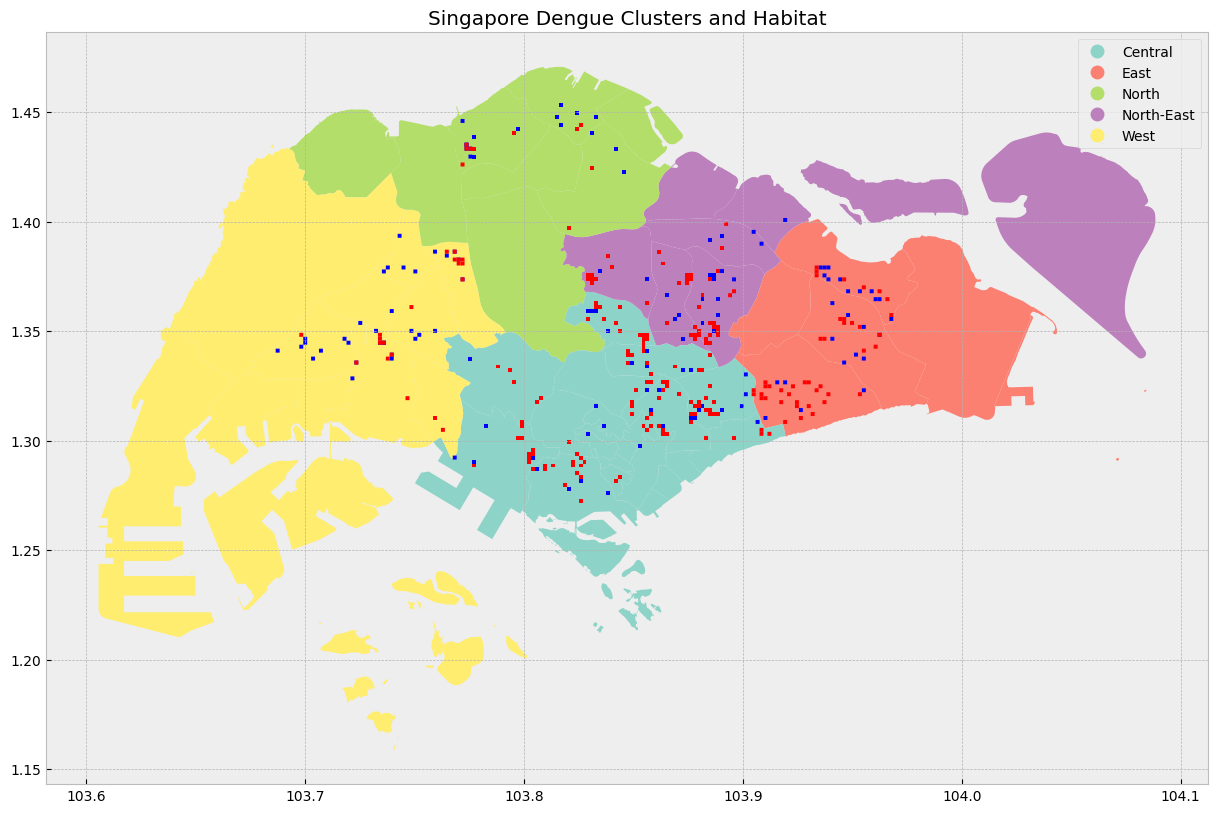

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))
sg_region.plot(ax=ax, column='district', cmap='Set3', legend=True)
all_cluster.plot(ax=ax, color='blue', alpha=1.0)
all_habitat.plot(ax=ax, color='red', alpha=1.0)
plt.title('Singapore Dengue Clusters and Habitat')
plt.show()